<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/Transfer-Learning---CIFAR-10/cifar10%2C_file_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10, mnist
from keras.layers.normalization import batch_normalization
from tensorflow.keras.utils import to_categorical

In [2]:
num_classes = 10
labels = ["airplane", "automobile", "bird", "cat", "deer",
          "dog", "frog", "horse", "ship", "truck"]

In [3]:
num_classes = 10
input_shape = (32, 32, 3)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Preprocess imput data for Keras
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170508288/170498071 [==============================] - 6s 0us/step


In [38]:
print(x_train.shape)
y_test

(50000, 32, 32, 3)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

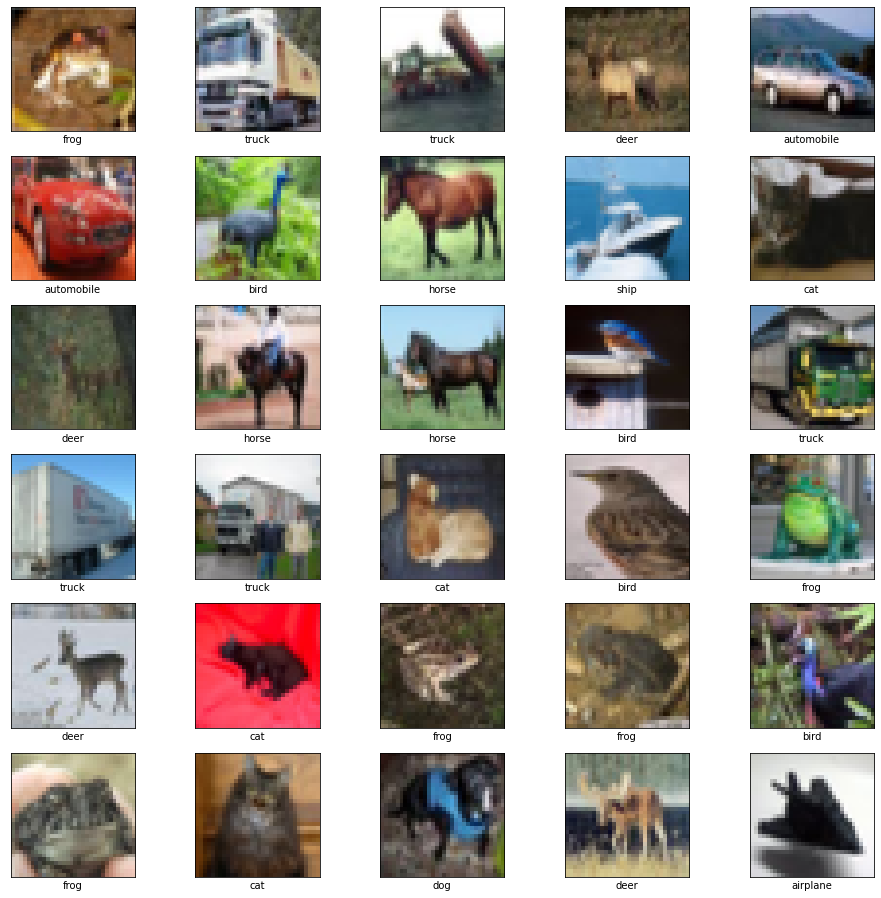

In [5]:
plt.figure(figsize=(16,16))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(labels[np.argmax(y_train[i])])
plt.show()

In [28]:
model=Sequential()
model.add(Conv2D(170, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
model.add(batch_normalization.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(185, kernel_size=(3,3), activation='relu',padding='same'))
model.add(batch_normalization.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(190, kernel_size=(3,3), activation='relu',padding='same'))
model.add(batch_normalization.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(180, kernel_size=(3,3), activation='relu',padding='same'))
model.add(batch_normalization.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(140, kernel_size=(3,3), activation='relu',padding='same'))
model.add(batch_normalization.BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.output_shape)

(None, 10)


In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 170)       4760      
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 170)      680       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 170)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 185)       283235    
                                                                 
 batch_normalization_16 (Bat  (None, 15, 15, 185)      740       
 chNormalization)                                                
                                                      

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss='binary_crossentropy', optimizer='adagrad'
# fit model
# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10 )
# mc= ModelCheckpoint('weights.h5', save_best_only=True)
training1 = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=28, batch_size=200)#, callbacks=[es, mc])#, batch_size=200

scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/28
250/250 [==============================] - 24s 87ms/step - loss: 1.5294 - accuracy: 0.4386 - val_loss: 4.6254 - val_accuracy: 0.1000
Epoch 2/28
250/250 [==============================] - 20s 79ms/step - loss: 1.0824 - accuracy: 0.6143 - val_loss: 2.2479 - val_accuracy: 0.3524
Epoch 3/28
250/250 [==============================] - 20s 80ms/step - loss: 0.8976 - accuracy: 0.6866 - val_loss: 1.4624 - val_accuracy: 0.5360
Epoch 4/28
250/250 [==============================] - 20s 79ms/step - loss: 0.7899 - accuracy: 0.7260 - val_loss: 1.0995 - val_accuracy: 0.6283
Epoch 5/28
250/250 [==============================] - 20s 80ms/step - loss: 0.7125 - accuracy: 0.7519 - val_loss: 1.1562 - val_accuracy: 0.5900
Epoch 6/28
250/250 [==============================] - 20s 80ms/step - loss: 0.6471 - accuracy: 0.7788 - val_loss: 0.7968 - val_accuracy: 0.7367
Epoch 7/28
250/250 [==============================] - 20s 80ms/step - loss: 0.5973 - accuracy: 0.7939 - val_loss: 0.7810 - val_accuracy:

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss='binary_crossentropy', optimizer='adagrad'
# fit model
# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10 )
# mc= ModelCheckpoint('weights.h5', save_best_only=True)
training2 = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=40, batch_size=200)
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/40
250/250 [==============================] - 19s 69ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 1.2588 - val_accuracy: 0.7879
Epoch 2/40
250/250 [==============================] - 17s 67ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 1.3744 - val_accuracy: 0.7707
Epoch 3/40
250/250 [==============================] - 16s 63ms/step - loss: 0.0267 - accuracy: 0.9910 - val_loss: 1.3151 - val_accuracy: 0.7757
Epoch 4/40
250/250 [==============================] - 16s 64ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 1.2617 - val_accuracy: 0.7843
Epoch 5/40
250/250 [==============================] - 16s 63ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 1.2566 - val_accuracy: 0.7919
Epoch 6/40
250/250 [==============================] - 16s 63ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 1.2092 - val_accuracy: 0.7924
Epoch 7/40
250/250 [==============================] - 16s 65ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 1.2591 - val_accuracy:

In [12]:
# Prediction
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
print(y_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


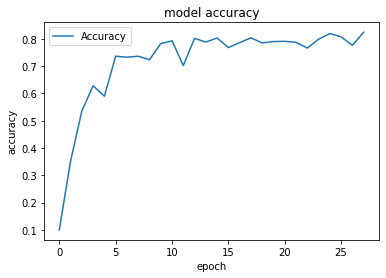

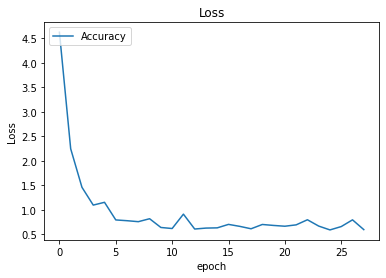

In [32]:
plt.plot(training1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

plt.plot(training1.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

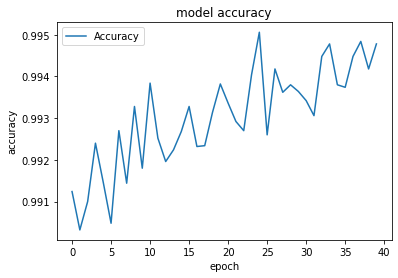

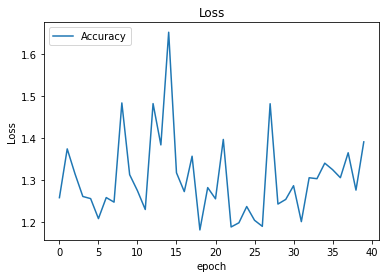

In [31]:
# plt.plot(training2.history['val_loss'])
plt.plot(training2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

plt.plot(training2.history['val_loss'])
# plt.plot(training2.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size=64
train_generator = train_datagen.flow_from_directory(
        '/content/cats_dogs/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = val_datagen.flow_from_directory(
        '/content/cats_dogs/data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

**TRANSFER LEARNING**

**COMPARISON OF ALL MODELS**

**VGG 16 MODEL**

In [66]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

In [67]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [68]:
model_ = Sequential()
for layer in vgg16_model.layers:
    layer.trainable = False
    model_.add(layer)
    
model.add(Dropout(0.3)) 
# Dropout, one form of regularization    
model_.add(Flatten())
model_.add(Dense(240,activation='relu'))
#add Dence layer with Softmax activation function and 10 outputs
model_.add(Dense(10, activation='softmax'))

In [69]:
model_.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [70]:
model_.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10 )
# mc= ModelCheckpoint('weights.h5', save_best_only=True)
training_vgg16 = model_.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=200)#, callbacks=[es, mc])#, batch_size=200
# Final evaluation of the model
scores = model_.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/30
250/250 [==============================] - 18s 68ms/step - loss: 1.4451 - accuracy: 0.4995 - val_loss: 1.2948 - val_accuracy: 0.5500
Epoch 2/30
250/250 [==============================] - 17s 66ms/step - loss: 1.2217 - accuracy: 0.5763 - val_loss: 1.2219 - val_accuracy: 0.5704
Epoch 3/30
250/250 [==============================] - 17s 66ms/step - loss: 1.1648 - accuracy: 0.5965 - val_loss: 1.2020 - val_accuracy: 0.5779
Epoch 4/30
250/250 [==============================] - 17s 66ms/step - loss: 1.1293 - accuracy: 0.6069 - val_loss: 1.1755 - val_accuracy: 0.5890
Epoch 5/30
250/250 [==============================] - 17s 67ms/step - loss: 1.0976 - accuracy: 0.6196 - val_loss: 1.1624 - val_accuracy: 0.5916
Epoch 6/30
250/250 [==============================] - 17s 66ms/step - loss: 1.0789 - accuracy: 0.6240 - val_loss: 1.1496 - val_accuracy: 0.5997
Epoch 7/30
250/250 [==============================] - 17s 66ms/step - loss: 1.0500 - accuracy: 0.6348 - val_loss: 1.1410 - val_accuracy:

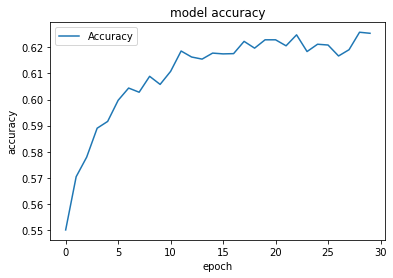

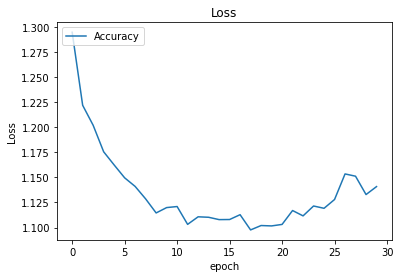

In [71]:
plt.plot(training_vgg16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

plt.plot(training_vgg16.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

**RESNET 101**

In [55]:
resnet101_model = tf.keras.applications.ResNet101(include_top=False, weights="imagenet", input_shape=(32,32,3))

171458560/171446536 [==============================] - 5s 0us/step


In [60]:
resnet101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [61]:
model_ = Sequential()
for layer in resnet101_model.layers:
    layer.trainable = False
    model_.add(layer)
    
model.add(Dropout(0.3)) 
# Dropout, one form of regularization    
model_.add(Flatten())
model_.add(Dense(240,activation='relu'))
#add Dence layer with Softmax activation function and 10 outputs
model_.add(Dense(10, activation='softmax'))

ValueError: ignored

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 170)       4760      
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 170)      680       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 170)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 185)       283235    
                                                                 
 batch_normalization_16 (Bat  (None, 15, 15, 185)      740       
 chNormalization)                                                
                                                      

In [59]:
model_.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss='binary_crossentropy', optimizer='adagrad'
# fit model
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10 )
mc= ModelCheckpoint('weights.h5', save_best_only=True)
training2 = model_.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=200, callbacks=[es, mc])#, batch_size=200
# Final evaluation of the model
scores = model_.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/50
250/250 [==============================] - 18s 68ms/step - loss: 1.4525 - accuracy: 0.5009 - val_loss: 1.2929 - val_accuracy: 0.5550
Epoch 2/50
250/250 [==============================] - 17s 69ms/step - loss: 1.2238 - accuracy: 0.5768 - val_loss: 1.2370 - val_accuracy: 0.5704
Epoch 3/50
250/250 [==============================] - 17s 67ms/step - loss: 1.1664 - accuracy: 0.5962 - val_loss: 1.2043 - val_accuracy: 0.5771
Epoch 4/50
250/250 [==============================] - 17s 67ms/step - loss: 1.1279 - accuracy: 0.6085 - val_loss: 1.1782 - val_accuracy: 0.5845
Epoch 5/50
250/250 [==============================] - 17s 67ms/step - loss: 1.0984 - accuracy: 0.6184 - val_loss: 1.1638 - val_accuracy: 0.5915
Epoch 6/50
250/250 [==============================] - 17s 68ms/step - loss: 1.0740 - accuracy: 0.6261 - val_loss: 1.1392 - val_accuracy: 0.6008
Epoch 7/50
250/250 [==============================] - 19s 78ms/step - loss: 1.0506 - accuracy: 0.6344 - val_loss: 1.1352 - val_accuracy:

KeyboardInterrupt: ignored